In [1]:
!git clone https://github.com/charvishukla/cse151a-pokemon-project.git

Cloning into 'cse151a-pokemon-project'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 92 (delta 36), reused 49 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (92/92), 9.29 MiB | 11.63 MiB/s, done.
Resolving deltas: 100% (36/36), done.


# Milestone 2:  Data Exploration & Initial Preprocessing

# Imports 

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# 1. Loading Datasets:

In [5]:
pokemon_TCG= pd.read_csv("pokemon-tcg-dataset(1999-2023).csv")
pokemon_TCG.describe()

,hp,convertedRetreatCost
count,14536.000000,13678.000000
mean,104.839708,1.699664
std,61.041205,0.866636
min,10.000000,1.000000
25%,60.000000,1.000000
50%,80.000000,1.000000
75%,130.000000,2.000000
max,340.000000,5.000000


In [6]:
price_guide = pd.read_csv("price-guide.csv", low_memory=False)
price_guide.describe()

,id,gamestop-price,gamestop-trade-price,upc,sales-volume,genre,asin,epid
count,6.029600e+04,0.0,0.0,1.000000e+00,60296.000000,0.0,0.0,0.0
mean,3.126286e+06,NaN,NaN,8.206501e+11,37.243996,NaN,NaN,NaN
std,2.003219e+06,NaN,NaN,NaN,111.923299,NaN,NaN,NaN
min,2.522800e+04,NaN,NaN,8.206501e+11,1.000000,NaN,NaN,NaN
25%,9.592028e+05,NaN,NaN,8.206501e+11,2.000000,NaN,NaN,NaN
50%,3.457958e+06,NaN,NaN,8.206501e+11,7.000000,NaN,NaN,NaN
75%,4.614387e+06,NaN,NaN,8.206501e+11,23.000000,NaN,NaN,NaN
max,7.747398e+06,NaN,NaN,8.206501e+11,11000.000000,NaN,NaN,NaN


# Combined TCG + Price Guide Dataset

We combined the TCG and Price Guide datasets. The code used for combining these datasets can be found in `filename.py` in the project repository/

In [8]:
price_guide_tcg = pd.read_csv("price-guide+TCG.csv", low_memory=False)
price_guide_tcg.describe()

,id,gamestop-price,gamestop-trade-price,upc,sales-volume,genre,asin,epid,hp,convertedRetreatCost
count,3.030000e+04,0.0,0.0,0.0,30300.000000,0.0,0.0,0.0,25631.000000,24132.000000
mean,1.815578e+06,NaN,NaN,NaN,48.108482,NaN,NaN,NaN,96.110569,1.666169
std,1.610918e+06,NaN,NaN,NaN,102.838685,NaN,NaN,NaN,52.140362,0.856412
min,2.522800e+04,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,10.000000,1.000000
25%,8.887088e+05,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,60.000000,1.000000
50%,9.596655e+05,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,80.000000,1.000000
75%,2.254008e+06,NaN,NaN,NaN,38.000000,NaN,NaN,NaN,120.000000,2.000000
max,7.747251e+06,NaN,NaN,NaN,1837.000000,NaN,NaN,NaN,340.000000,5.000000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'loose-price'}>,
        <Axes: title={'center': 'graded-price'}>],
       [<Axes: title={'center': 'box-only-price'}>,
        <Axes: title={'center': 'manual-only-price'}>,
        <Axes: title={'center': 'bgs-10-price'}>],
       [<Axes: title={'center': 'condition-17-price'}>,
        <Axes: title={'center': 'condition-18-price'}>,
        <Axes: title={'center': 'sales-volume'}>],
       [<Axes: title={'center': 'hp'}>, <Axes: >, <Axes: >]], dtype=object)

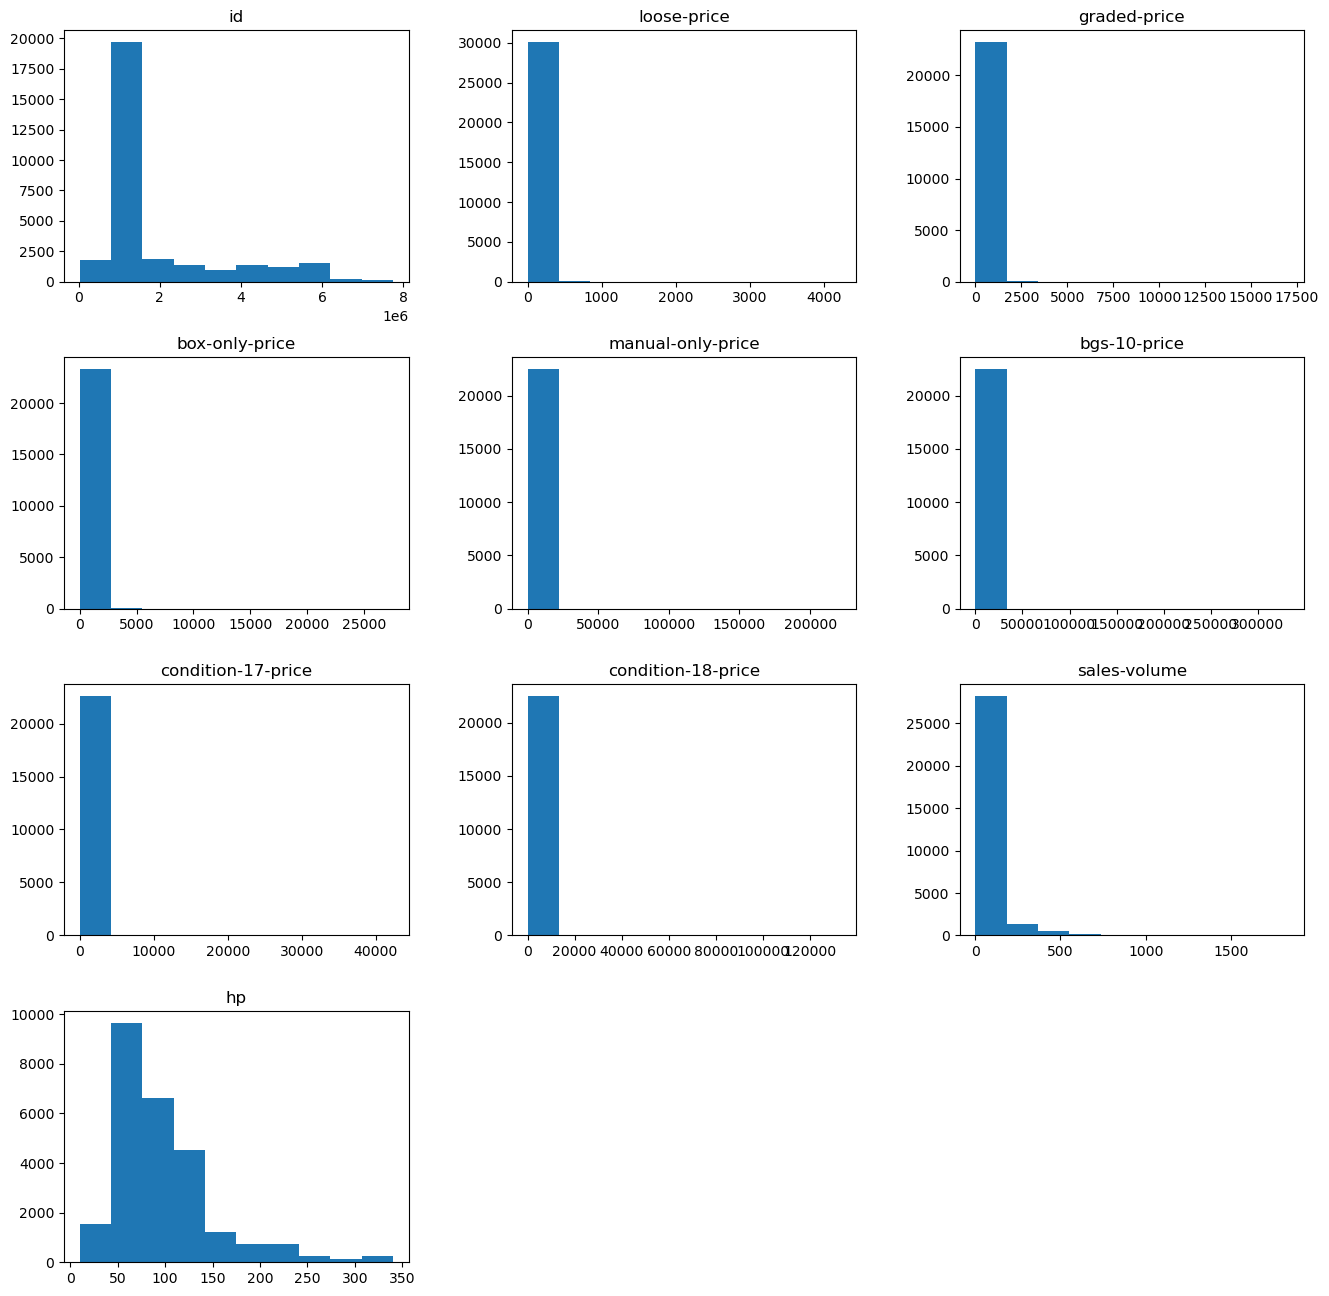

In [31]:
price_guide_tcg.hist(figsize = (16,16), grid = False)

The figures above show histograms of the data based on how many cards exist within a given range. The x-axes of the histograms are the based on the feature such as price, sales volume, or hp while the y-axes of the histograms describe how many entries there are of the cards in our dataset. For example if reading from the 'hp' histogram, we can say that there are about 1000 different cards in our dataset that have an HP value of 200.

# 2. Exploratory Data Analysis: Price Guide + TCG Dataset

### Shape of the dataset:


In [9]:
print("Dataset Shape ", price_guide_tcg.shape)

Dataset Shape  (30300, 56)


We will begin by exploring the data types of all columns in the `price_guide_tcg` DataFrame. 

In [10]:
price_guide_tcg.columns

Index(['tcg_id', 'id', 'console-name', 'product-name', 'loose-price',
       'cib-price', 'new-price', 'graded-price', 'box-only-price',
       'manual-only-price', 'bgs-10-price', 'condition-17-price',
       'condition-18-price', 'gamestop-price', 'gamestop-trade-price',
       'retail-loose-buy', 'retail-loose-sell', 'retail-cib-buy',
       'retail-cib-sell', 'retail-new-buy', 'retail-new-sell', 'upc',
       'sales-volume', 'genre', 'tcg-id', 'asin', 'epid', 'release-date',
       'set', 'series', 'publisher', 'generation', 'release_date', 'artist',
       'name', 'set_num', 'types', 'supertype', 'subtypes', 'level', 'hp',
       'evolvesFrom', 'evolvesTo', 'abilities', 'attacks', 'weaknesses',
       'retreatCost', 'convertedRetreatCost', 'rarity', 'flavorText',
       'nationalPokedexNumbers', 'legalities', 'resistances', 'rules',
       'regulationMark', 'ancientTrait'],
      dtype='object')

### Number of Null rows by column:

We need to determine the number of entries in each column. This will help us reason about which columns are the best to keep based on their values. To do so, we will use the `.isna()` function from Pandas Library. 

In [11]:
null_counts_with_dtype = {col: (price_guide_tcg[col].isna().sum(), price_guide_tcg[col].dtype) for col in price_guide_tcg.columns}
null_counts_dtype_df = pd.DataFrame(
    [(col, null_count, dtype) for col, (null_count, dtype) in null_counts_with_dtype.items()],
    columns=['Column Name', 'Null Count', 'Data Type']
)

null_counts_with_dtype

{'tcg_id': (0, dtype('O')),
 'id': (0, dtype('float64')),
 'console-name': (0, dtype('O')),
 'product-name': (0, dtype('O')),
 'loose-price': (168, dtype('O')),
 'cib-price': (22454, dtype('O')),
 'new-price': (17982, dtype('O')),
 'graded-price': (7058, dtype('O')),
 'box-only-price': (6955, dtype('O')),
 'manual-only-price': (7798, dtype('O')),
 'bgs-10-price': (7796, dtype('O')),
 'condition-17-price': (7647, dtype('O')),
 'condition-18-price': (7793, dtype('O')),
 'gamestop-price': (30300, dtype('float64')),
 'gamestop-trade-price': (30300, dtype('float64')),
 'retail-loose-buy': (21070, dtype('O')),
 'retail-loose-sell': (168, dtype('O')),
 'retail-cib-buy': (22887, dtype('O')),
 'retail-cib-sell': (22454, dtype('O')),
 'retail-new-buy': (18357, dtype('O')),
 'retail-new-sell': (17982, dtype('O')),
 'upc': (30300, dtype('float64')),
 'sales-volume': (0, dtype('float64')),
 'genre': (30300, dtype('float64')),
 'tcg-id': (2005, dtype('O')),
 'asin': (30300, dtype('float64')),
 'epid

### Dropping columns with Null or Uninformative Values:

We will be dropping the following columns as they contain all (`genre` , `asin`,`epid` , `gamestop-price`) null rows. We have also set the `inplace` parameter to `True` because we do not want to make another copy of this dataframe in memory. 

In [12]:
price_guide_tcg = price_guide_tcg.drop(columns=['gamestop-price', 'gamestop-trade-price', 'gamestop-trade-price', 'tcg-id', 'upc', 'convertedRetreatCost',
                              'genre', 'asin', 'epid', 'evolvesFrom', 'evolvesTo',  'abilities', 'attacks', 'flavorText', 
                              'nationalPokedexNumbers', 'rules', 'regulationMark', 'ancientTrait', 'retreatCost',
                                'retail-loose-buy', 'retail-loose-sell', 'retail-new-buy', 'retail-new-sell', 'level', 'abilities', 
                                   'retail-cib-sell' ,     'retail-cib-buy',   'cib-price',  'new-price' ,  'flavorText', 'evolvesFrom', 'evolvesTo'])



price_guide_tcg.shape

(30300, 29)

### Unique Values in categorical data

We can see that there are 514 unique names for Pokemon card sets (which are found under the `console-name` column). There are also 52301 unique pokemon card names in the dataset (found from the `product-name` column). 

In [13]:
print('Console Name: ', price_guide_tcg['console-name'].nunique())
print('Product Name: ', price_guide_tcg['product-name'].nunique())
print('Types: ', price_guide_tcg['types'].nunique())
print('Super Type: ', price_guide_tcg['supertype'].nunique())
print('Sub Type: ', price_guide_tcg['subtypes'].nunique())
print('Weaknesses: ', price_guide_tcg['weaknesses'].nunique())
print('Artist: ', price_guide_tcg['artist'].nunique())
print('Generation: ', price_guide_tcg['generation'].nunique())

Console Name:  134
Product Name:  28522
Types:  36
Super Type:  3
Sub Type:  110
Weaknesses:  63
Artist:  302
Generation:  11


# Price Formatting conversion

Currently, all the prices in our dataset are stored as a string of the format: $\[some number\]. In order to conduct our exploratory data analysis, we will need convert such strings to floating point numbers. To do this, we have implemented the `convert_price_columns` function below. 

In [14]:
def convert_price_columns(df):
    def stringtoint(value):
        if isinstance(value, str) and value.startswith('$'):
            return float(value[1:])  
        return float(value)  

    for column in df.columns:
        if df[column].apply(lambda x: isinstance(x, str) and x.startswith('$')).any():
            df[column] = df[column].apply(stringtoint)
    
    return df

price_guide_tcg = convert_price_columns(price_guide_tcg)

In [15]:
price_guide_tcg2= price_guide_tcg.copy()

price_guide_tcg2 = price_guide_tcg.dropna()
price_guide_tcg2

,tcg_id,id,console-name,product-name,loose-price,graded-price,box-only-price,manual-only-price,bgs-10-price,condition-17-price,...,name,set_num,types,supertype,subtypes,hp,weaknesses,rarity,legalities,resistances
4,xy7-27,959046.0,Pokemon Ancient Origins,Ampharos EX #27,3.24,28.09,31.0,41.00,62.0,15.8,...,Ampharos-EX,27,['Lightning'],Pokémon,"['Basic', 'EX']",170.0,"[{'type': 'Fighting', 'value': '×2'}]",Rare Holo EX,"{'unlimited': 'Legal', 'expanded': 'Legal'}","[{'type': 'Metal', 'value': '-20'}]"
5,xy7-87,959105.0,Pokemon Ancient Origins,Ampharos EX #87,9.77,32.76,36.0,109.86,165.0,143.0,...,Ampharos-EX,87,['Lightning'],Pokémon,"['Basic', 'EX']",170.0,"[{'type': 'Fighting', 'value': '×2'}]",Rare Ultra,"{'unlimited': 'Legal', 'expanded': 'Legal'}","[{'type': 'Metal', 'value': '-20'}]"
23,xy7-55,959163.0,Pokemon Ancient Origins,Cottonee [Reverse Holo] #55,1.40,5.65,6.0,38.12,57.0,50.0,...,Cottonee,55,['Fairy'],Pokémon,['Basic'],40.0,"[{'type': 'Metal', 'value': '×2'}]",Common,"{'unlimited': 'Legal', 'expanded': 'Legal'}","[{'type': 'Darkness', 'value': '-20'}]"
46,xy7-54,959072.0,Pokemon Ancient Origins,Gardevoir #54,2.52,20.25,22.0,137.01,206.0,178.0,...,Gardevoir,54,['Fairy'],Pokémon,['Stage 2'],130.0,"[{'type': 'Metal', 'value': '×2'}]",Rare Holo,"{'unlimited': 'Legal', 'expanded': 'Legal'}","[{'type': 'Darkness', 'value': '-20'}]"
47,xy7-54,959162.0,Pokemon Ancient Origins,Gardevoir [Reverse Holo] #54,3.99,24.81,27.0,53.37,80.0,69.0,...,Gardevoir,54,['Fairy'],Pokémon,['Stage 2'],130.0,"[{'type': 'Metal', 'value': '×2'}]",Rare Holo,"{'unlimited': 'Legal', 'expanded': 'Legal'}","[{'type': 'Darkness', 'value': '-20'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30288,xy1-97,806714.0,Pokemon XY,Xerneas EX [Reverse Holo] #97,4.52,27.33,30.0,62.54,94.0,81.0,...,Xerneas-EX,97,['Fairy'],Pokémon,"['Basic', 'EX']",170.0,"[{'type': 'Metal', 'value': '×2'}]",Rare Holo EX,"{'unlimited': 'Legal', 'expanded': 'Legal'}","[{'type': 'Darkness', 'value': '-20'}]"
30289,xy1-78,806575.0,Pokemon XY,Yveltal #78,2.76,25.95,29.0,190.75,286.0,248.0,...,Yveltal,78,['Darkness'],Pokémon,['Basic'],130.0,"[{'type': 'Lightning', 'value': '×2'}]",Rare,"{'unlimited': 'Legal', 'expanded': 'Legal'}","[{'type': 'Fighting', 'value': '-20'}]"
30292,xy1-144,886726.0,Pokemon XY,Yveltal EX #144,16.00,50.00,55.0,60.00,90.0,78.0,...,Yveltal-EX,144,['Darkness'],Pokémon,"['Basic', 'EX']",170.0,"[{'type': 'Lightning', 'value': '×2'}]",Rare Ultra,"{'unlimited': 'Legal', 'expanded': 'Legal'}","[{'type': 'Fighting', 'value': '-20'}]"
30293,xy1-79,806576.0,Pokemon XY,Yveltal EX #79,4.11,23.00,25.0,59.13,89.0,77.0,...,Yveltal-EX,79,['Darkness'],Pokémon,"['Basic', 'EX']",170.0,"[{'type': 'Lightning', 'value': '×2'}]",Rare Holo EX,"{'unlimited': 'Legal', 'expanded': 'Legal'}","[{'type': 'Fighting', 'value': '-20'}]"


# Prices and Data Subsets

The following subsets are divisions of the main dataset seperated into the different prices we want to train our models on. Each feature contains a price based on the selling price of a specific Pokémon Card according to their grade.

<!-- 1. `cib_price_sub`: Subset of the prices of Pokémon Cards graded as a 7 or 7.5-->

1. `bgs_price_sub`: Subset of the prices of Pokémon Cards graded as a 10 by BGS 
2. `box_only_price_sub`: Subset of the prices of Pokémon Cards graded as a 9.5
3. `condition_17_price_sub`: Subset of the prices of Pokémon Cards graded as a 10 by CGC
4. `condition_18_price_sub`: Subset of the prices of Pokémon Cards graded as a 10 by SGC
5. `graded_price_sub`: Subset of the prices of Pokémon Cards graded as a 9
6. `loose_sub`: Subset of the prices of Pokémon Cards that are ungraded
<!-- 7. `new_price_sub`: Subset of the prices of Pokémon Cards that are graded as a 8 or 8.5 -->
7. `manual_only_price_sub`: Subset of the prices of Pokémon Cards that are graded as a 10 by PSA

BGS, CGC, SGC, and PSA are all grading companies that assess the quality of the Pokémon Card and assign a grade to the card. We want to split the data into subsets in order to accurately predict the price of a Pokémon Card across all companies based on grade. Since there is variation in price based on which company is grading the card, splitting the data into different sets will give our model the best chance to predict a card's value. This also allows us to create a variety of models in order to choose the best model that accurately predicts a card's value based on their grade.

In [16]:
bgs_price_sub = price_guide_tcg[price_guide_tcg['bgs-10-price'].notnull()]
bgs_price_sub = bgs_price_sub.dropna()

box_only_price_sub = price_guide_tcg[price_guide_tcg['box-only-price'].notnull()]
box_only_price_sub = box_only_price_sub.dropna()

condition_17_price_sub = price_guide_tcg[price_guide_tcg['condition-17-price'].notnull()]
condition_17_price_sub = condition_17_price_sub.dropna()

condition_18_price_sub = price_guide_tcg[price_guide_tcg['condition-18-price'].notnull()]
condition_18_price_sub = condition_18_price_sub.dropna()

graded_price_sub = price_guide_tcg[price_guide_tcg['graded-price'].notnull()]
graded_price_sub = graded_price_sub.dropna()

loose_sub = price_guide_tcg[price_guide_tcg['loose-price'].notnull()]
loose_sub = loose_sub.dropna()

manual_only_price_sub = price_guide_tcg[price_guide_tcg['manual-only-price'].notnull()]
manual_only_price_sub = manual_only_price_sub.dropna()


# Plots


## Average Price by Grade

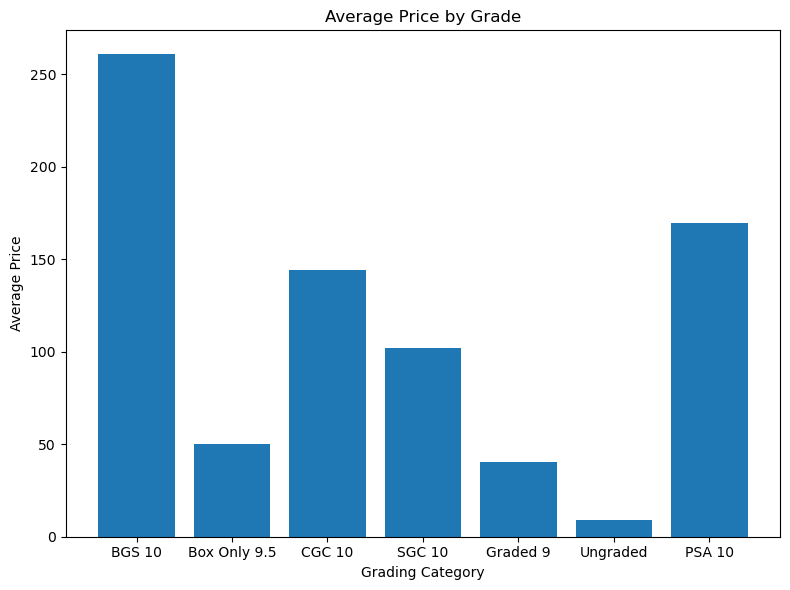

In [28]:
price_columns = {
    'BGS 10': 'bgs-10-price',
    'Box Only 9.5': 'box-only-price',
    'CGC 10': 'condition-17-price',
    'SGC 10': 'condition-18-price',
    'Graded 9': 'graded-price',
    'Ungraded': 'loose-price',
    'PSA 10': 'manual-only-price'
}

# Extract mean prices for each category
average_prices = {grade: price_guide_tcg[col].dropna().mean() for grade, col in price_columns.items()}

# Plotting average price comparison
plt.figure(figsize=(8, 6))
plt.bar(average_prices.keys(), average_prices.values())
plt.title("Average Price by Grade")
plt.xlabel("Grading Category")
plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The figure above shows the average price of Pokémon Cards based on the grade they receive and whether or not they are graded by a specific company. The companies included in our data are BGS, CGC, SGC, and PSA and we are tracking grades of 9, 9.5, and 10 as well as ungraded prices.

## Pairplot

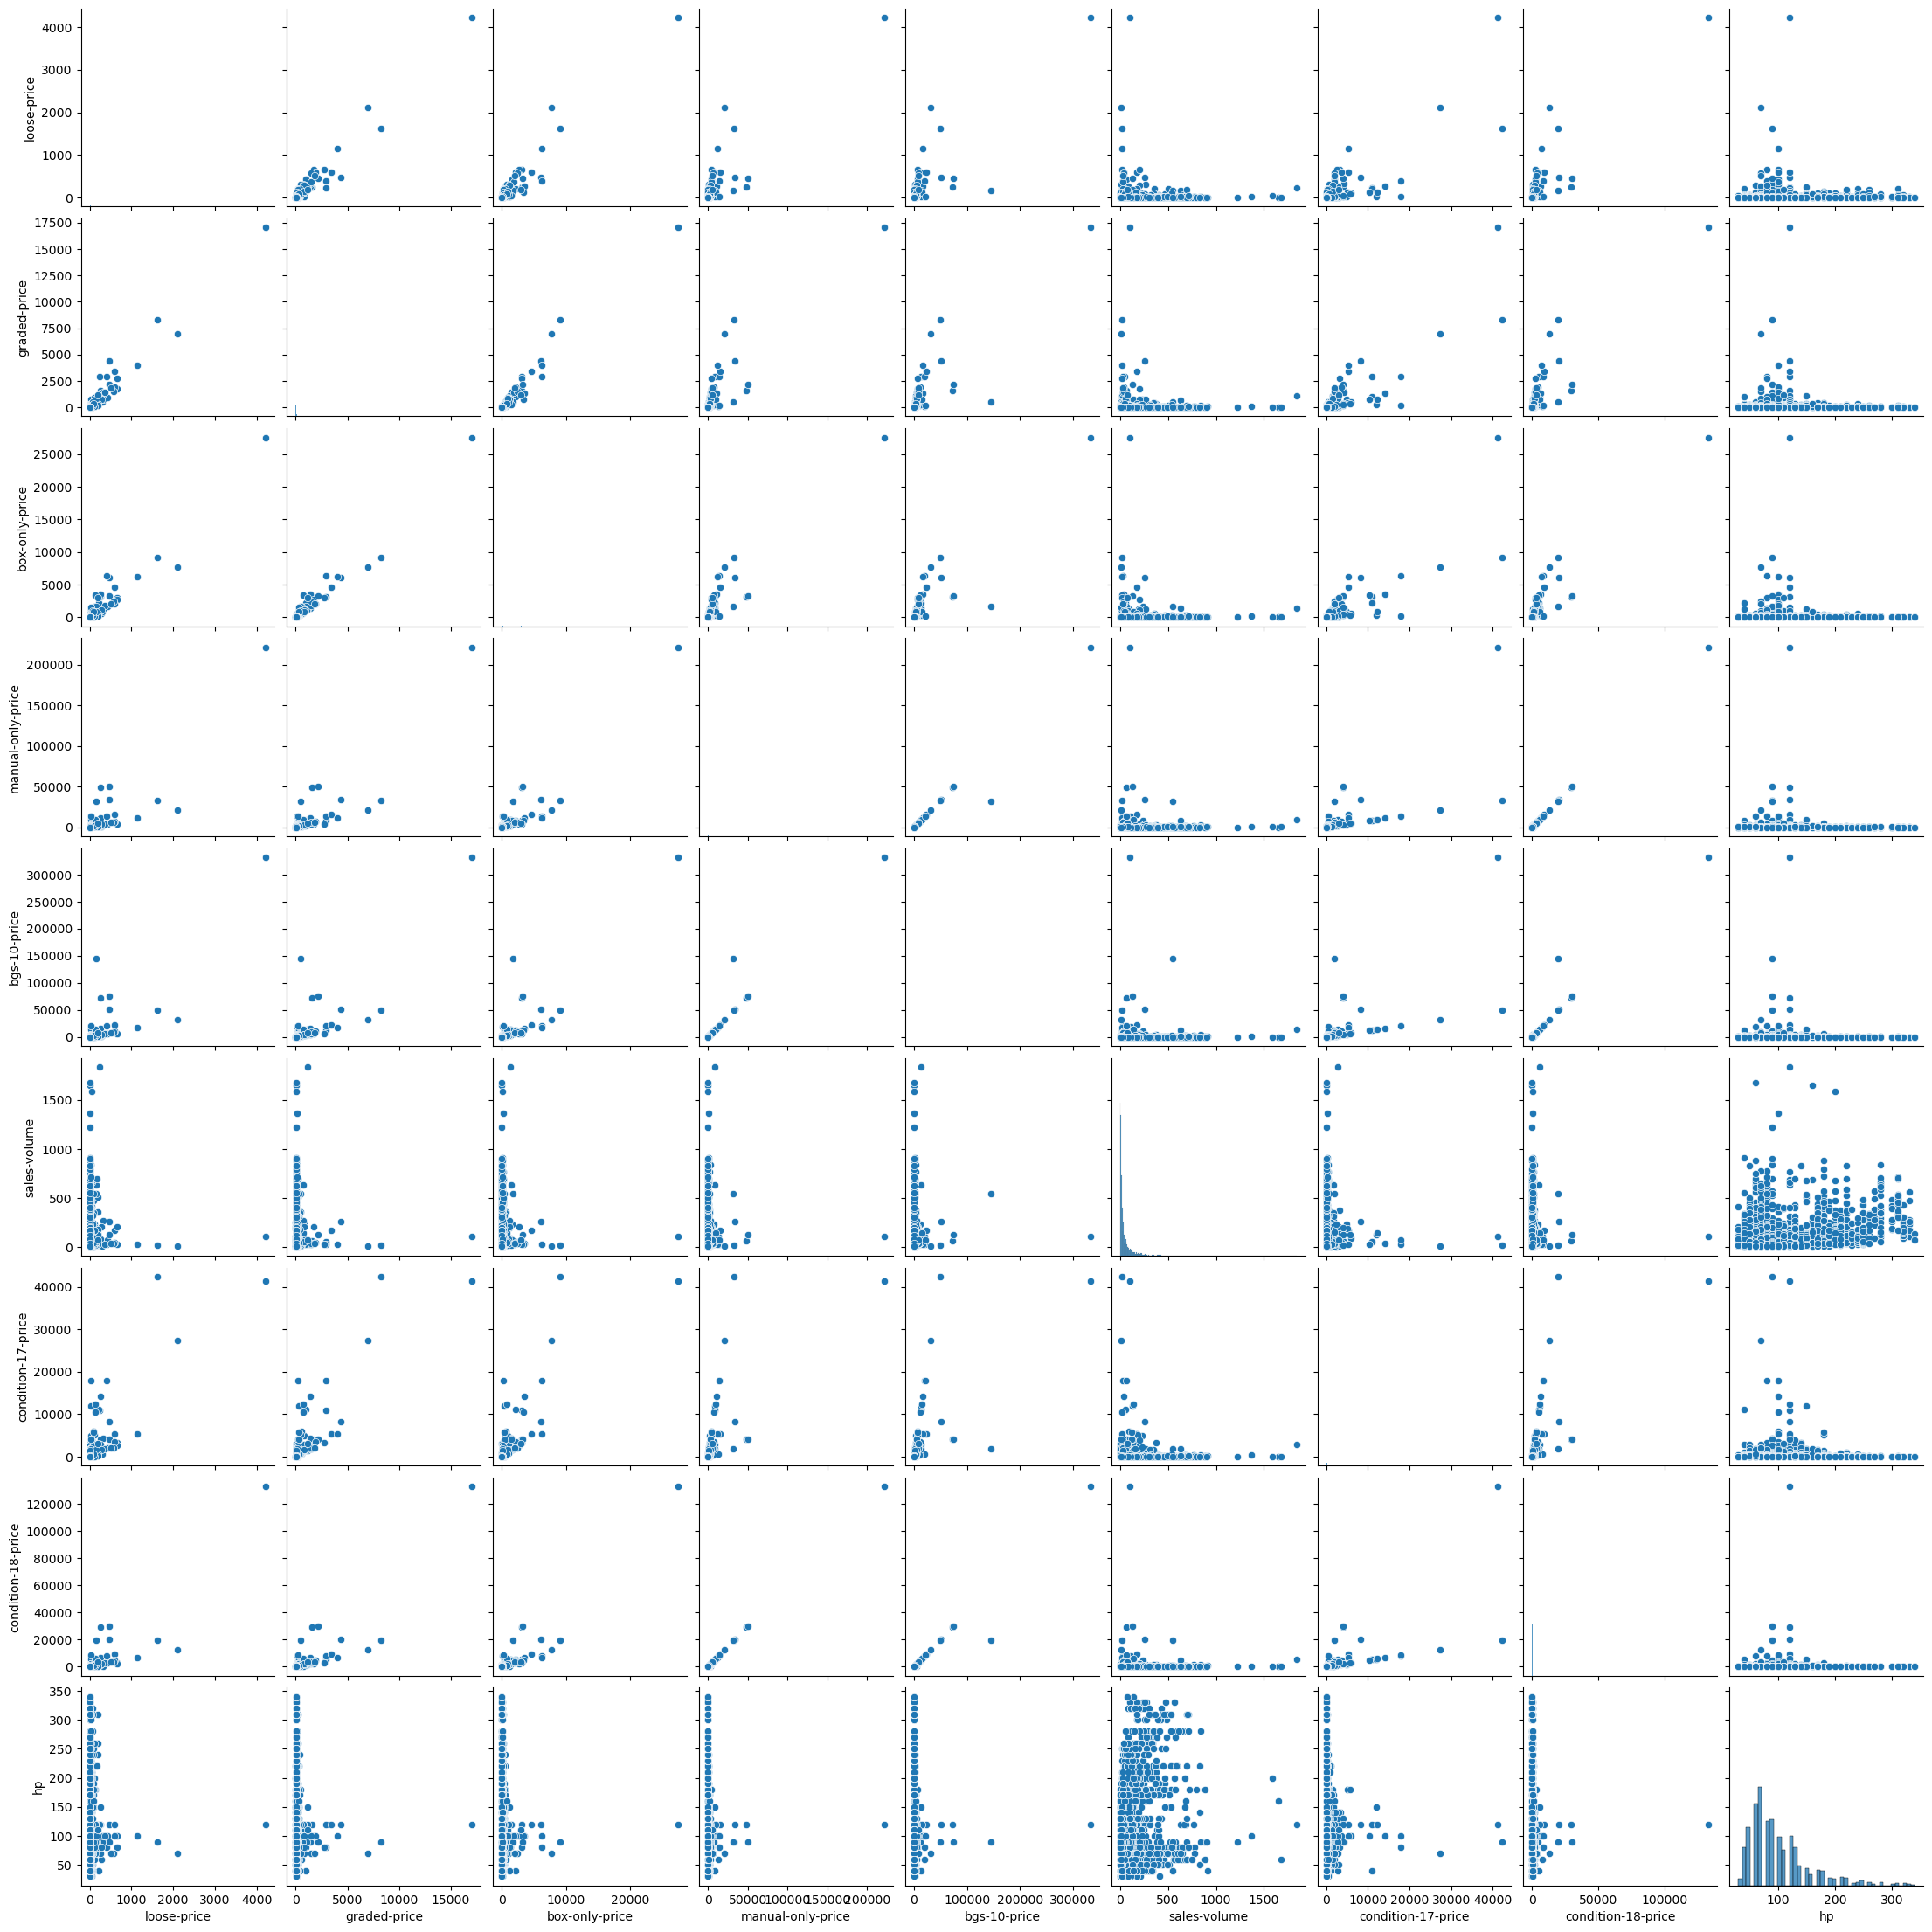

In [18]:
selected_columns = ['loose-price', 'graded-price', 'box-only-price', 
                      'manual-only-price','bgs-10-price', 'sales-volume',  'condition-17-price', 
                    'condition-18-price','hp']  
price_guide_subset = price_guide_tcg2[selected_columns]

sns.pairplot(price_guide_subset)
plt.show()

The pairplot above shows the relationship between all of the features we are comparing in our combined dataset based on the average price per grade. Note that these features are what we will currently train our models on and we aim to address the relationships of the features through polynomial and linear means.

# Heatmap 

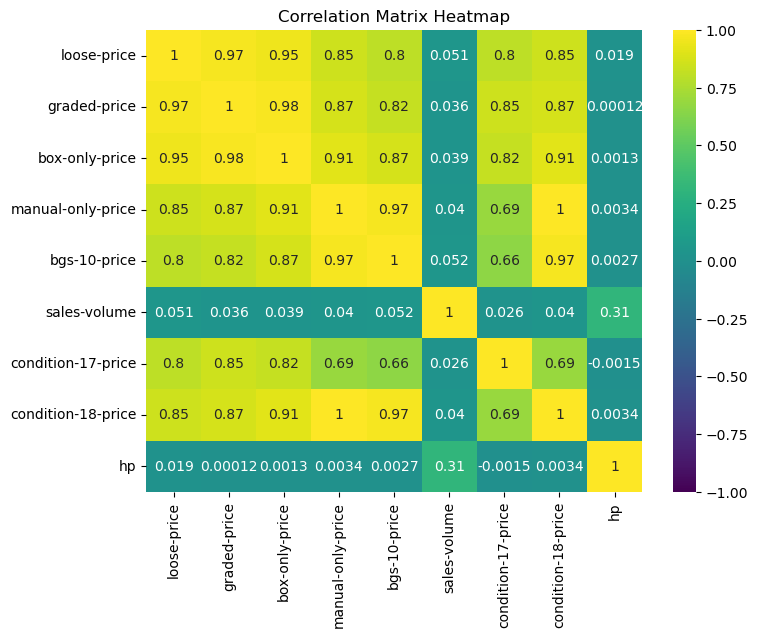

In [19]:
columns_for_corr = price_guide_subset

corr_matrix = columns_for_corr.corr(method="pearson")
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, annot=True, cmap='viridis')
plt.title("Correlation Matrix Heatmap")
plt.show()

The figure above is a heatmap that further analyzes the relationship between the features of our data. We aim to select features with high correlations to one another in order to accurately train our model.

# Plotting relationships with `console-name` as categories:


In [20]:
print('Number of unique values in the console-name columns', price_guide['console-name'].nunique())
print('   ')
print('Top 3 uniquely occuring console-name values: ')
print(price_guide_tcg['console-name'].value_counts().head(4))

Number of unique values in the console-name columns 514
   
Top 3 uniquely occuring console-name values: 
console-name
Pokemon Promo               1119
Pokemon Scarlet & Violet     527
Pokemon Fusion Strike        521
Pokemon Paldea Evolved       497
Name: count, dtype: int64


In [21]:
subset = ['console-name', 'loose-price', 'graded-price', 'box-only-price', 
                      'manual-only-price','bgs-10-price', 'sales-volume',  'condition-17-price', 
                    'condition-18-price','hp'] 

price_guide_subset = price_guide_tcg2[subset]
top_three_consoles = price_guide_subset['console-name'].value_counts().head(3).index
console_df = price_guide_subset.loc[price_guide_subset['console-name'].isin(top_three_consoles)].copy()
console_df['console-name'] = console_df['console-name'].astype('category')


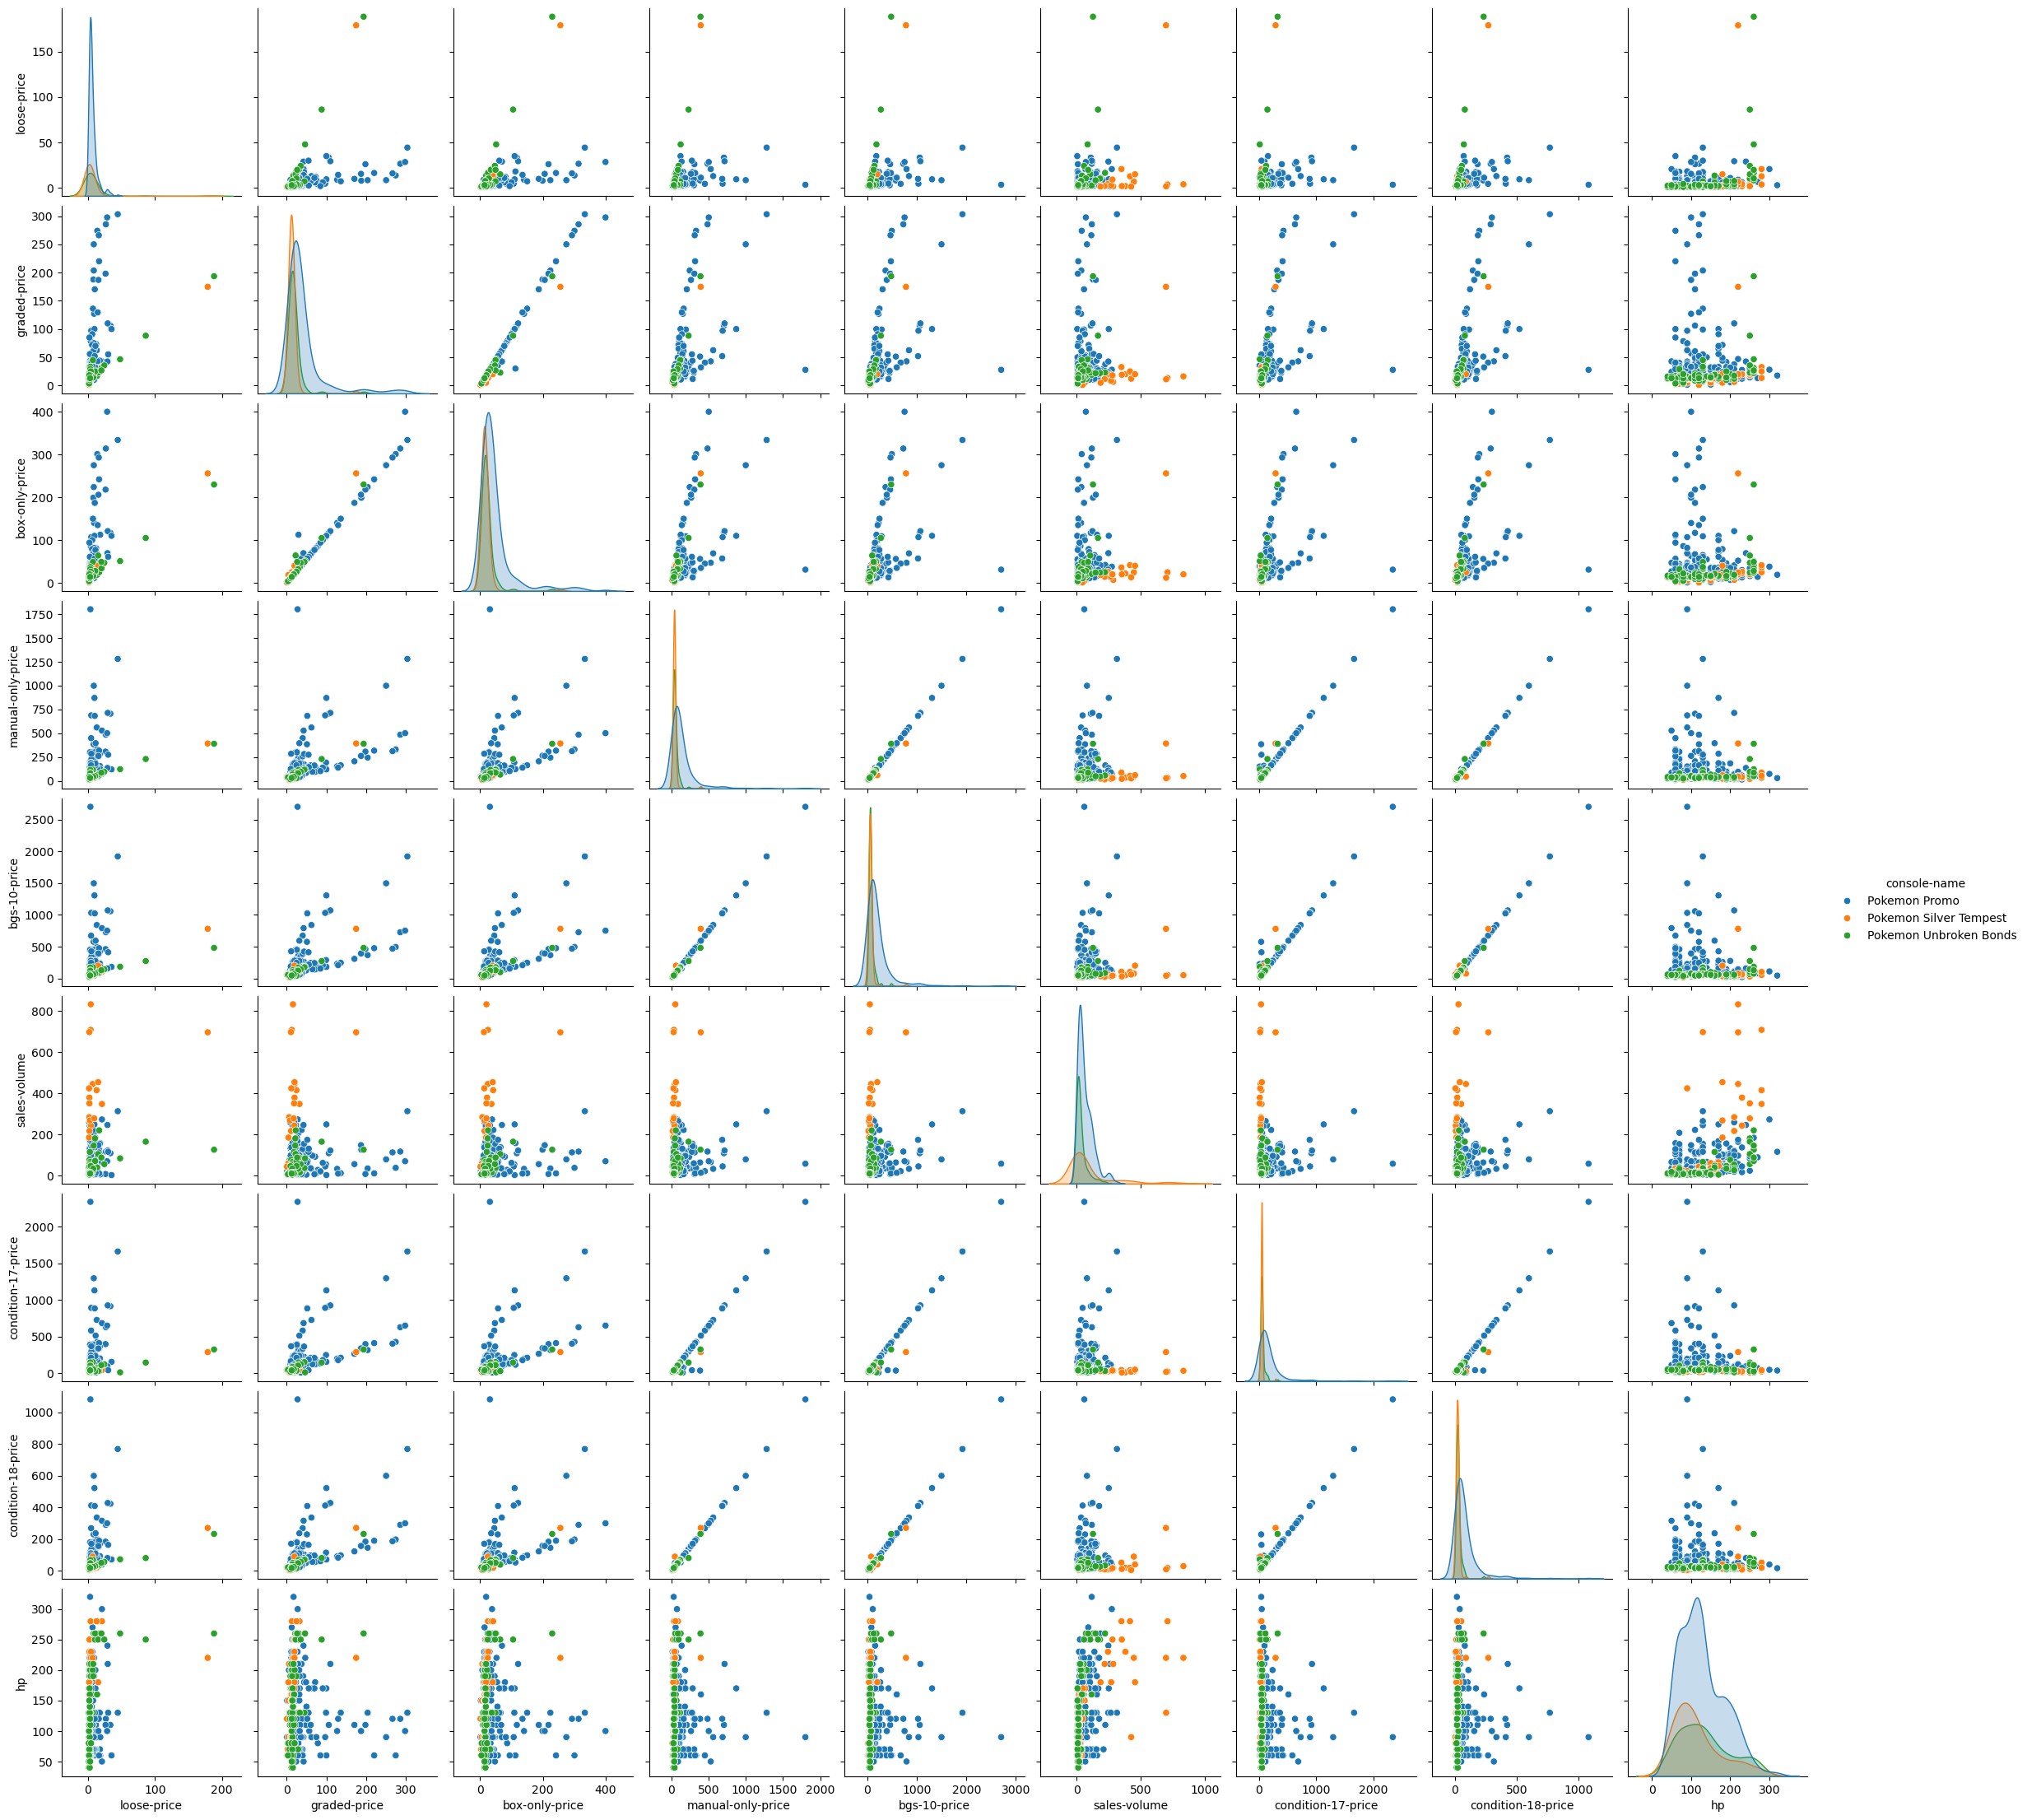

In [22]:
sns.pairplot(console_df, hue='console-name')

The figure above shows the relationship between features based off of the top 3 uniquely occurring console-names in our data. In this case, the console-names describe the collections of different Pokémon Cards also known as "sets". The top 3 uniquely occurring sets are the Pokémon Promo cards, Silver Tempest cards, and Unbroken Bonds cards, indicating that these sets have the highest number of cards in their collections.

## Plotting relationships with `artist` as categories

In [23]:
price_guide_tcg['artist']

0           Ken Sugimori
1           Ken Sugimori
2           Ken Sugimori
3           Ken Sugimori
4          Eske Yoshinob
              ...       
30295    Kagemaru Himeno
30296    Kagemaru Himeno
30297    Kagemaru Himeno
30298       Toyste Beach
30299       Toyste Beach
Name: artist, Length: 30300, dtype: object

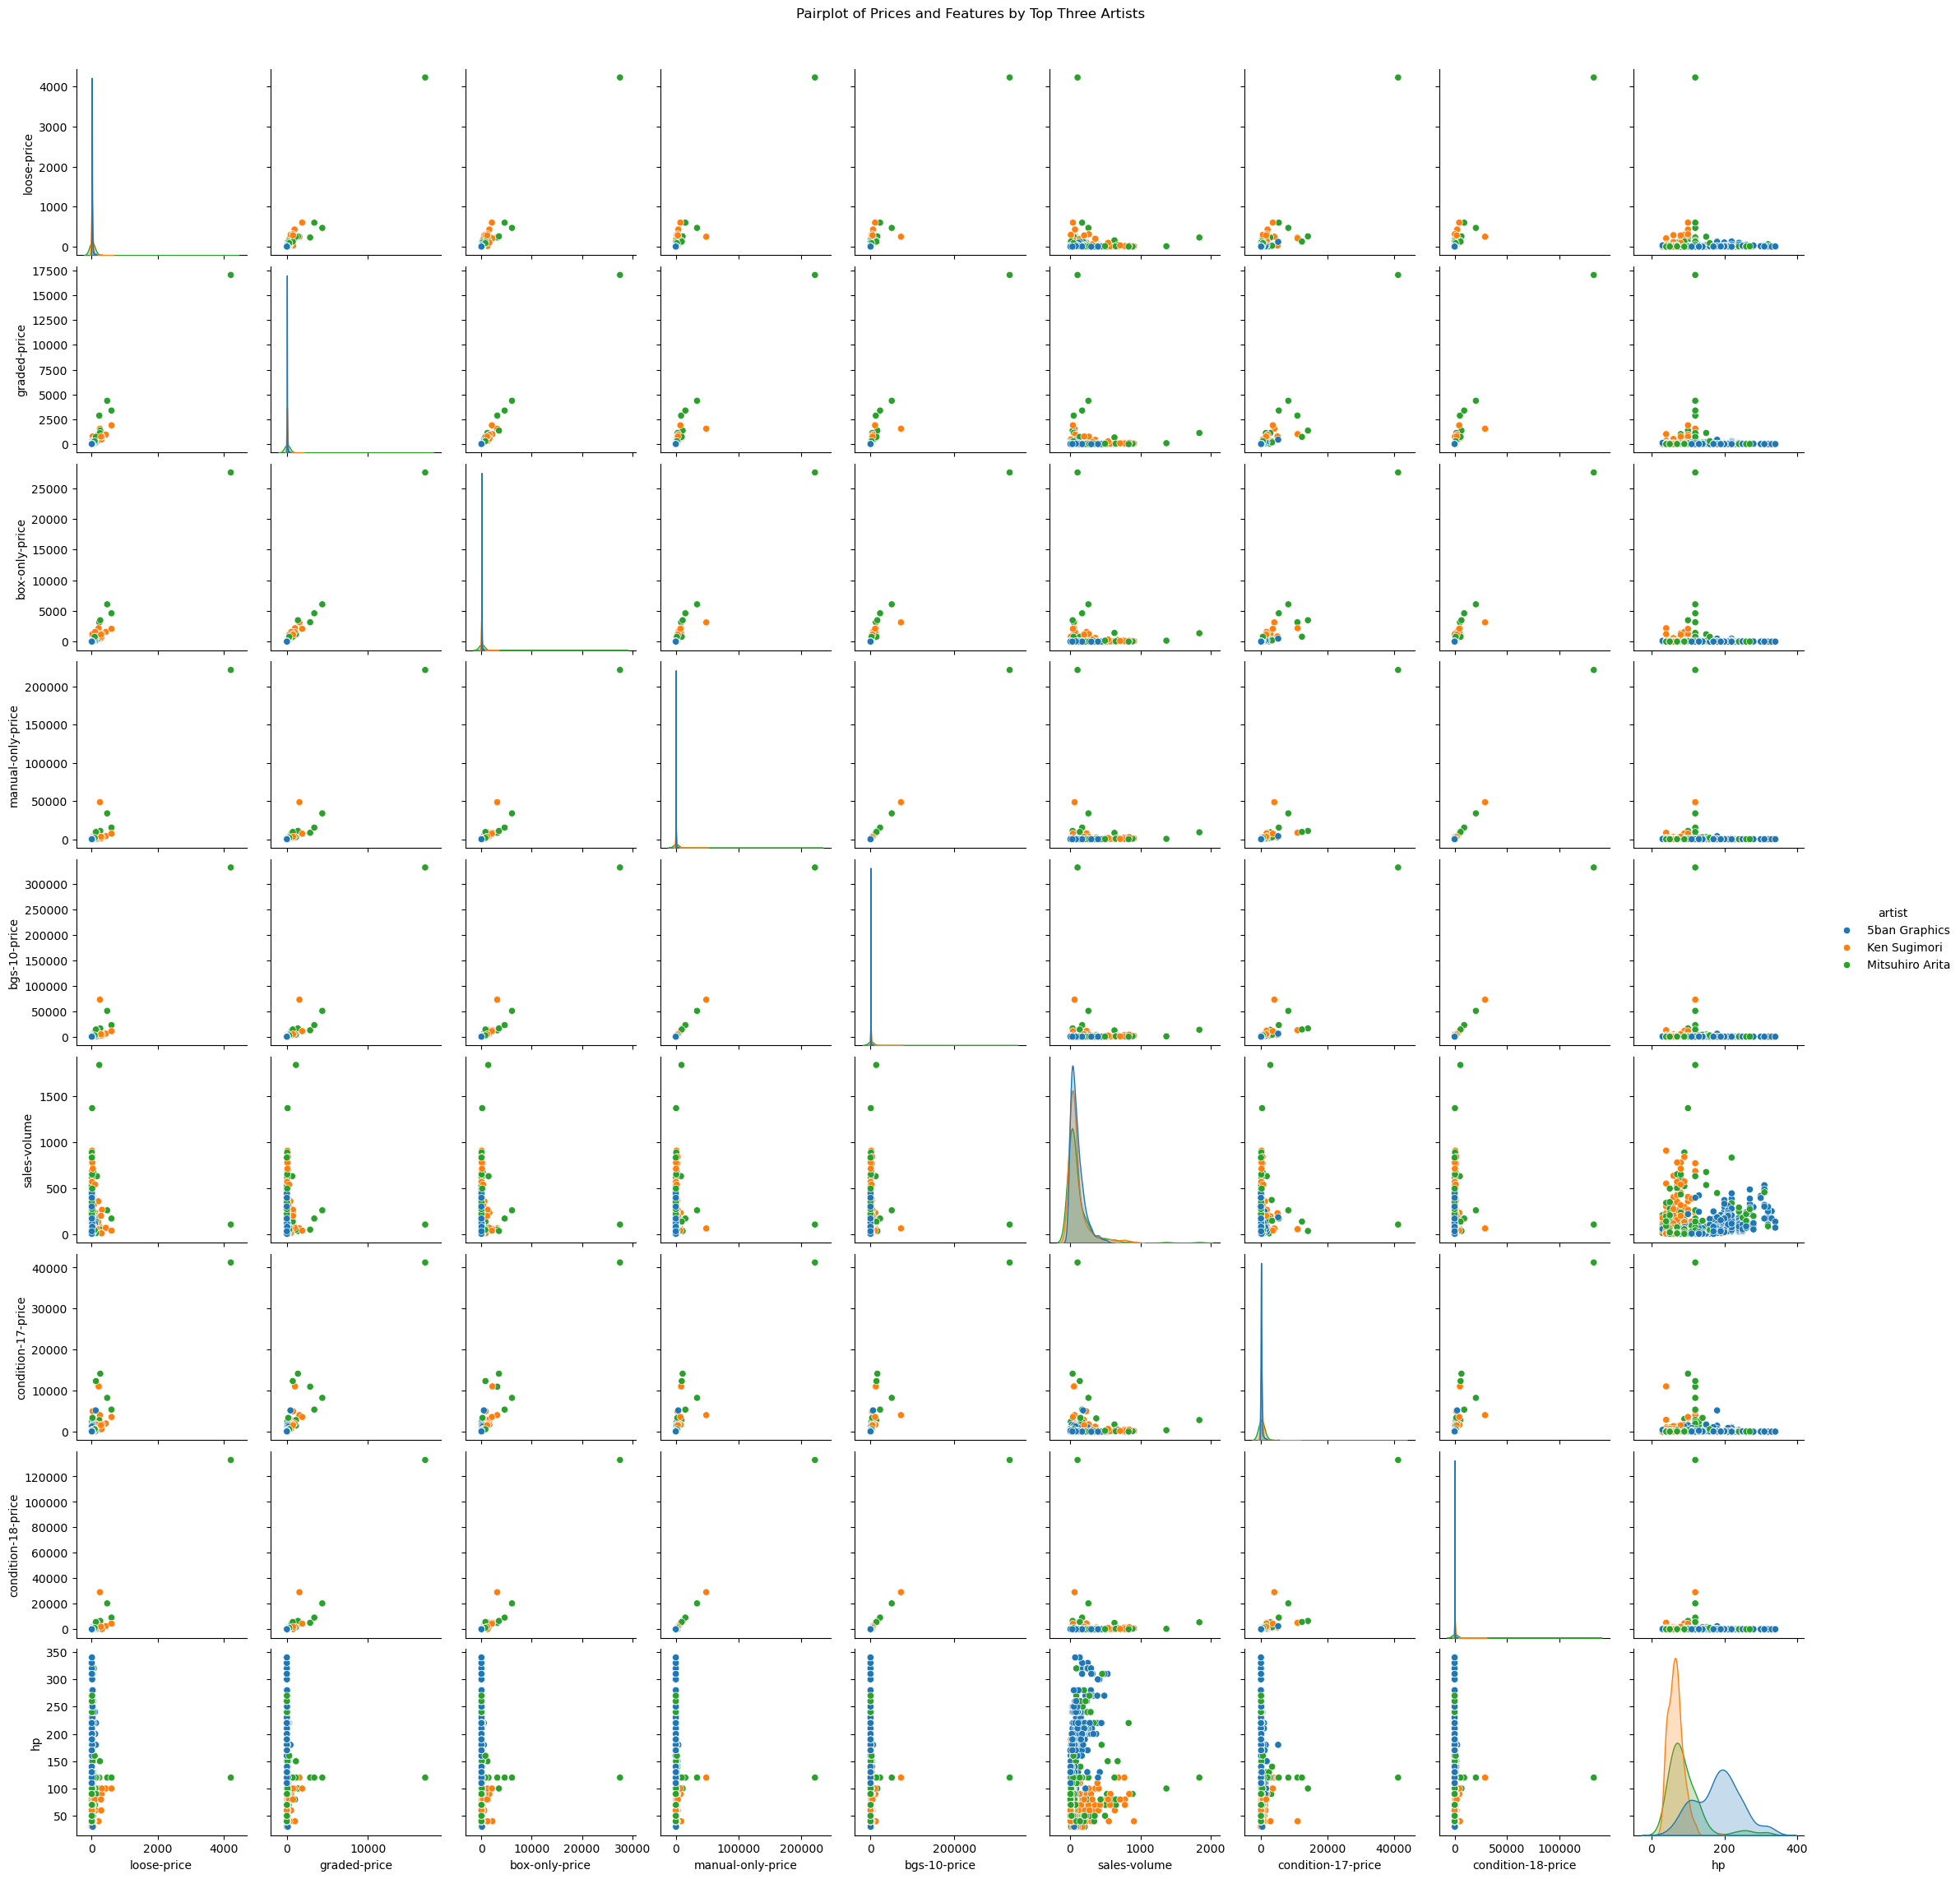

In [24]:
subset = ['artist', 'loose-price', 'graded-price', 'box-only-price', 
                      'manual-only-price','bgs-10-price', 'sales-volume',  'condition-17-price', 
                    'condition-18-price','hp'] 

price_guide_subset = price_guide_tcg2[subset]

price_guide_subset
top_three = price_guide_subset['artist'].value_counts().head(3).index
artist_df = price_guide_subset.loc[price_guide_subset['artist'].isin(top_three)].copy()
artist_df['artist'] = artist_df['artist'].astype('category')

sns.pairplot(artist_df, hue='artist')
plt.suptitle("Pairplot of Prices and Features by Top Three Artists", y=1.02)
plt.show()

The figure above shows the relationships between the features based off of the specific artist that has drawn the Pokémon Card. The top 3 uniquely identified artists of the dataset are 5ban Graphics, Ken Sugimori, and Mitsuhiro Arita. This indicates that these 3 artists have drawn the most Pokémon Cards in history, and we aim to analyze if there is a relationship between the specific artist and price of the Pokémon Card.

# Grade 10 price by Pokemon Type

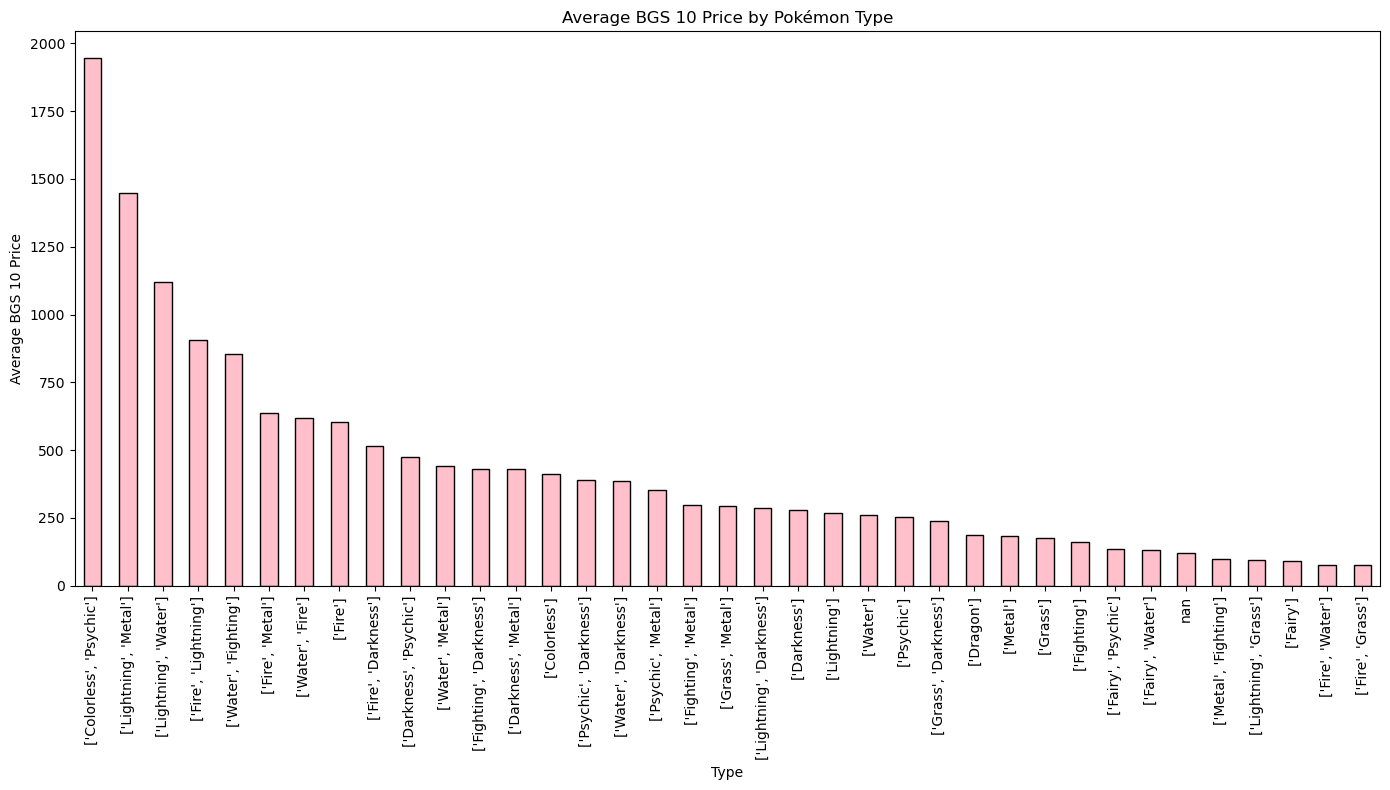

In [25]:
price_guide_tcg['types'] = price_guide_tcg['types'].astype(str)  # Ensure the 'types' column is string type
unique_types = price_guide_tcg['types'].unique()

bgs_10_price_by_type = price_guide_tcg.groupby('types')['bgs-10-price'].mean()

bgs_10_price_by_type = bgs_10_price_by_type.sort_values(ascending=False)

plt.figure(figsize=(14, 8))
bgs_10_price_by_type.plot(kind='bar', color='pink', edgecolor='black')
plt.title("Average BGS 10 Price by Pokémon Type")
plt.xlabel("Type")
plt.ylabel("Average BGS 10 Price")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The figure above shows the Pokémon Cards with the highest price based on their specific typing. Each Pokémon Card has a type, and in this case the Pokémon Cards with the highest average price are those belonging to the 'Colorless' and 'Psychic' typing. We will explore this data further by using it to train models specifically aimed to predict prices based on typing and determining whether or not this is an accurate form of measurement.

# Milestone 3, Pre-processing TODO List

### 1. Outlier Removal

In [26]:
price_guide_subset.describe()

,loose-price,graded-price,box-only-price,manual-only-price,bgs-10-price,sales-volume,condition-17-price,condition-18-price,hp
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,11.043423,48.624218,63.596358,269.745136,424.807579,62.399518,195.321833,161.561341,100.845212
std,79.443088,323.930300,486.569103,3465.324301,5542.460171,118.630244,1133.810455,2079.091298,52.895938
min,0.210000,0.990000,1.000000,6.000000,9.000000,2.000000,1.250000,3.250000,30.000000
25%,1.490000,12.420000,14.000000,35.320000,53.000000,9.000000,44.000000,21.000000,60.000000
50%,2.430000,17.770000,20.000000,48.510000,73.000000,19.000000,54.000000,29.000000,90.000000
75%,5.760000,32.000000,36.000000,102.790000,156.000000,63.000000,116.000000,62.000000,120.000000
max,4223.260000,17033.540000,27550.000000,221599.740000,332400.000000,1837.000000,42316.000000,132960.000000,340.000000


The summary statistics indicate that the standard deviations across multiple columns are extremely high relative to their means, suggesting a wide spread of values within each variable. For instance, `loose-price` has a standard deviation of 869.98, while its mean is only 36.69. Similarly, `graded-price`, `box-only-price`, and `manual-only-price` all display substantial variability with standard deviations much larger than their respective means.


This high variability indicates the presence of outliers. This can also be seen from our pairplots in the previous sections where there are some scatter-points really away from the clusters. Therefore, for the pre-processing stage, we will apply z-score normalization and drop extreme values (i.e. when the z-score is greater than 3 for some value). This will allow us to reveal the underlying shape of the distribution. 

### 2. Categorical variable encoding 